In [240]:
import importlib 
import pip

def check_and_install(package): 
    
    try: importlib.import_module(package) 
    
    except ImportError: 

        print(f"{package} is not installed. Installing...") 
        pip.main(['install', package]) 

# List of required packages 
required_packages = ['pandas', 'numpy', 'matplotlib'] 
# Check and install each package 
for package in required_packages: 
    check_and_install(package)

Import Packages

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import mapclassify

In [242]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [243]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, ttest_ind
from scipy.stats import linregress

In [244]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [246]:
columns_to_skip = ['name', 'host_name']
df_airbnb_total = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/FSDS_Group_Assignment/refs/heads/main/Datasets/listings.csv', 
                              usecols=lambda col: col not in columns_to_skip)

In [247]:
df_airbnb_total = df_airbnb_total.drop('neighbourhood_group', axis=1)
df_airbnb_total = df_airbnb_total.drop('license', axis=1)

df_airbnb_total

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,116268,586671,Enfield,51.611370,-0.118880,Private room,40.0,7,38,2024-01-01,0.28,1,105,1
1,117203,255103,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5,91,2024-06-09,0.59,1,33,10
2,127652,134938,Camden,51.559528,-0.144319,Entire home/apt,215.0,5,216,2024-07-09,1.35,1,134,5
3,127860,161720,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2,0,NaN,NaN,1,0,0
4,131444,646165,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30,148,2024-06-15,0.93,2,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96177,1239087592369786950,480846254,Camden,51.547717,-0.143016,Entire home/apt,155.0,1,0,NaN,NaN,1,332,0
96178,1239112017665871678,25727709,Southwark,51.505380,-0.091734,Entire home/apt,238.0,5,0,NaN,NaN,37,365,0
96179,1239112357239275295,25727709,Southwark,51.505380,-0.091734,Entire home/apt,188.0,5,0,NaN,NaN,37,358,0
96180,1239116439240556456,25727709,Southwark,51.505380,-0.091734,Entire home/apt,457.0,5,0,NaN,NaN,37,324,0


In [248]:
availability_stats = df_airbnb_total['availability_365'].describe()
print(availability_stats)

count    96182.000000
mean       132.112817
std        133.987287
min          0.000000
25%          0.000000
50%         88.000000
75%        263.000000
max        365.000000
Name: availability_365, dtype: float64


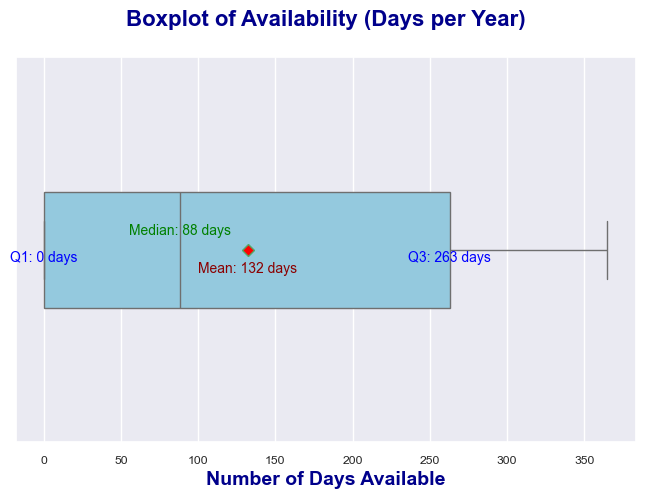

In [249]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_airbnb_total['availability_365'], 
            color='skyblue', 
            width=0.3, 
            showmeans=True, meanprops = {'marker':'D', 'markerfacecolor':'red'})

# Extract key statistics for annotation
mean = availability_stats['mean']
median = availability_stats['50%']
q1 = availability_stats['25%']
q3 = availability_stats['75%']

# Annotate the plot with key statistics
plt.text(mean, 0.05, f'Mean: {mean:.0f} days', ha='center', va='center', color='darkred', fontsize=10)
plt.text(median, -0.05, f'Median: {int(median)} days', ha='center', va='center', color='green', fontsize=10)
plt.text(q1, 0.02, f'Q1: {int(q1)} days', ha='center', va='center', color='blue', fontsize=10)
plt.text(q3, 0.02, f'Q3: {int(q3)} days', ha='center', va='center', color='blue', fontsize=10)

# Customize the plot
plt.title('Boxplot of Availability (Days per Year)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Days Available', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

In [282]:
def simple_linear_regression(df, x_variables, y_variable):
    # Check for missing values
    print(df.isnull().sum())

    # Drop rows with missing values (optional but recommended)
    df = df.dropna()

    # Define the predictor (independent) and response (dependent) variables
    X = df[[x_variables]] # For multiple regression, add more predictors here
    y = df[y_variable]

    # Add a constant term for the intercept
    X = sm.add_constant(X)
    
    # Create and fit the OLS model
    model = sm.OLS(y, X).fit()

    # Generate predicted values
    df['Predicted_Value_'] = model.predict(X)

    r_squared = model.rsquared
    mse = mean_squared_error(y, df['Predicted_Value_'])

    # Plot the original data points
    plt.scatter(df[x_variables], df[y_variable], color='blue', label='Data points')

    # Plot the regression line
    plt.plot(df[x_variables], df['Predicted_Value_'], color='red', linewidth=1.5, label='Least Squares Line')

    # Add R-squared value as text annotation
    plt.text(0.05, 0.95, f'R-squared = {r_squared:.3f}', transform=plt.gca().transAxes,
            fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='black', alpha=0.6), ha='left')
    
    plt.text(0.05, 0.85, f'MSE = {mse:.3f}', transform=plt.gca().transAxes,
            fontsize=8, color='black', bbox=dict(facecolor='white', edgecolor='black', alpha=0.6), ha='left')

    # Add labels and title
    plt.xlabel(x_variables, fontsize=14, fontweight='bold', color='darkblue')
    plt.ylabel(y_variable, fontsize=14, fontweight='bold', color='darkblue')
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.title(f'Linear Regression: {y_variable} vs. {x_variables}\n', fontsize=16, fontweight='bold', color='darkblue')
    plt.legend(fontsize='10', loc='upper right', frameon=True, fancybox=True, shadow=True)

    # Show the plot
    plt.show()

In [251]:
# Load the shapefile for London boroughs
london_gdf = gpd.read_file('https://github.com/wbwhaha/FSDS_Group_Assignment/raw/refs/heads/main/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
building_geo = gpd.read_file('https://github.com/wbwhaha/FSDS_Group_Assignment/raw/refs/heads/main/Shapefiles_London/01_LondonBuildings.shp')
rail_geo = gpd.read_file('https://github.com/wbwhaha/FSDS_Group_Assignment/raw/refs/heads/main/Shapefiles_London/01_LondonRailNetwork.shp')
street_geo = gpd.read_file('https://github.com/wbwhaha/FSDS_Group_Assignment/raw/refs/heads/main/Shapefiles_London/01_LondonStreetNetwork.shp')
water_geo = gpd.read_file('https://github.com/wbwhaha/FSDS_Group_Assignment/raw/refs/heads/main/Shapefiles_London/01_LondonWaterBody.shp')

# Convert to the same coordinate reference system
london_gdf = london_gdf.to_crs(epsg=4326)
building_geo = building_geo.to_crs(epsg=4326)
rail_geo = rail_geo.to_crs(epsg=4326)
street_geo = street_geo.to_crs(epsg=4326)
water_geo = water_geo.to_crs(epsg=4326)

print(london_gdf.columns)

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')


In [252]:
borough_code = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/FSDS_Group_Assignment/refs/heads/main/Datasets/borough%20code.csv')

In [253]:
df_total = pd.merge(df_airbnb_total, borough_code, left_on='neighbourhood', right_on='Borough Name').drop('Borough Name', axis=1)
df_total

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Borough Code
0,116268,586671,Enfield,51.611370,-0.118880,Private room,40.0,7,38,2024-01-01,0.28,1,105,1,E09000010
1,117203,255103,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5,91,2024-06-09,0.59,1,33,10,E09000013
2,127652,134938,Camden,51.559528,-0.144319,Entire home/apt,215.0,5,216,2024-07-09,1.35,1,134,5,E09000007
3,127860,161720,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2,0,NaN,NaN,1,0,0,E09000027
4,131444,646165,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30,148,2024-06-15,0.93,2,6,12,E09000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96177,1239087592369786950,480846254,Camden,51.547717,-0.143016,Entire home/apt,155.0,1,0,NaN,NaN,1,332,0,E09000007
96178,1239112017665871678,25727709,Southwark,51.505380,-0.091734,Entire home/apt,238.0,5,0,NaN,NaN,37,365,0,E09000028
96179,1239112357239275295,25727709,Southwark,51.505380,-0.091734,Entire home/apt,188.0,5,0,NaN,NaN,37,358,0,E09000028
96180,1239116439240556456,25727709,Southwark,51.505380,-0.091734,Entire home/apt,457.0,5,0,NaN,NaN,37,324,0,E09000028


In [254]:
airbnb_price = df_total[['Borough Code', 'price']]
airbnb_price.drop(airbnb_price[np.isnan(airbnb_price['price'])].index, inplace=True)

airbnb_price.head()

C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\2388845450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_price.drop(airbnb_price[np.isnan(airbnb_price['price'])].index, inplace=True)


,Borough Code,price
0,E09000010,40.0
1,E09000013,131.0
2,E09000007,215.0
4,E09000022,150.0
5,E09000001,145.0


In [255]:
# Calculate mean price per borough code
airbnb_mean_price = airbnb_price.groupby('Borough Code')['price'].mean().reset_index()

# Rename columns for clarity (optional) 
airbnb_mean_price.columns = ['Borough Code', 'Mean Price']

# Display result
print(airbnb_mean_price)

   Borough Code  Mean Price
0     E09000001  268.852732
1     E09000002  111.605042
2     E09000003  138.207671
3     E09000004   99.355319
4     E09000005  155.698219
5     E09000006  113.805839
6     E09000007  215.062673
7     E09000008  101.863986
8     E09000009  140.421085
9     E09000010  128.619968
10    E09000011  130.579701
11    E09000012  155.578820
12    E09000013  192.574276
13    E09000014  127.271696
14    E09000015  109.168378
15    E09000016  128.821739
16    E09000017  114.602659
17    E09000018  135.883891
18    E09000019  182.398814
19    E09000020  324.943467
20    E09000021  132.549407
21    E09000022  274.918117
22    E09000023  118.684783
23    E09000024  153.904573
24    E09000025  139.128233
25    E09000026  121.119895
26    E09000027  190.634146
27    E09000028  201.279156
28    E09000029   94.529968
29    E09000030  153.951264
30    E09000031  114.422953
31    E09000032  184.268560
32    E09000033  315.281734


In [256]:
merged_geo = london_gdf.merge(airbnb_mean_price, left_on='GSS_CODE', right_on='Borough Code', how='left')

Objective: Establish a spatial understanding of the Airbnb market.

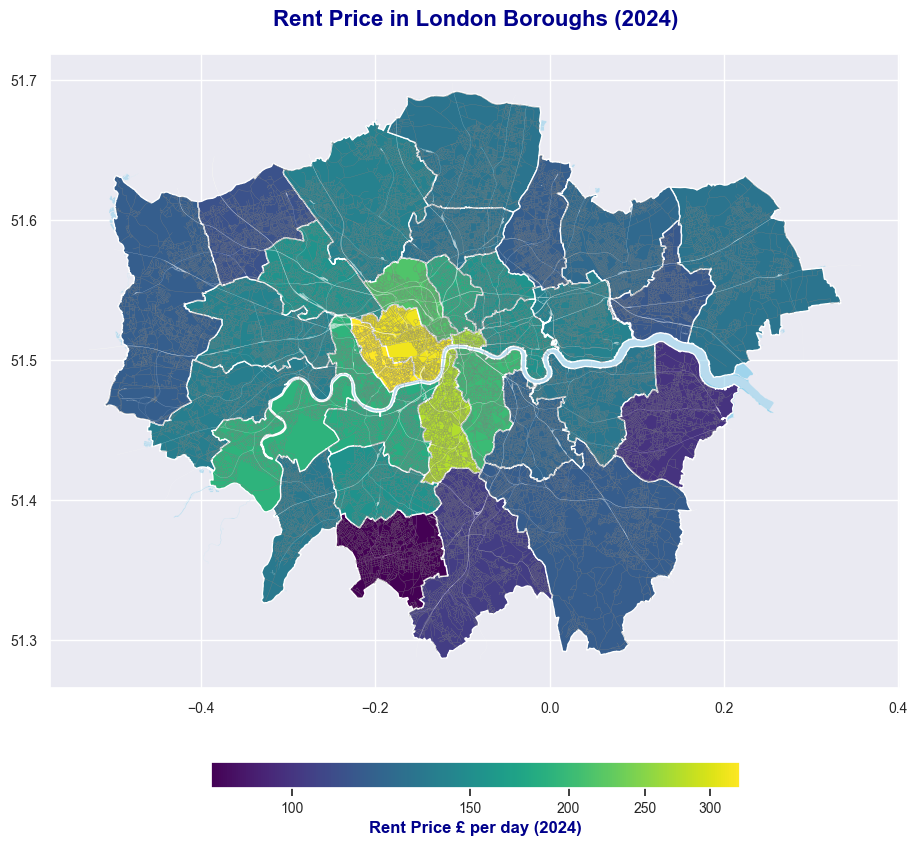

In [ ]:
# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Plot additional layers
street_geo.plot(ax=ax, color='grey', linewidth=0.2)
rail_geo.plot(ax=ax, color='white', linewidth=0.1, alpha=0.5)
water_geo.plot(ax=ax, color='skyblue', linewidth=0.1, alpha=0.5)

# Plot choropleth map for rent price with power scaling
norm = mcolors.PowerNorm(gamma=0.5) 
a_1 = merged_geo.plot(
        column='Mean Price',
        ax=ax,
        cmap='viridis',
        norm=norm)

figure_1 = a_1.figure
cb_ax_1 = figure_1.axes[0]
cb_ax_1.tick_params(labelsize=10)

# Add color bar
sm_color = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm_color._A = []

cbar = plt.colorbar(sm_color, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1)
cbar.set_label('Rent Price £ per day (2024)', fontsize=12, fontweight='bold', color='darkblue')
cbar.ax.tick_params(labelsize=10)

# Add centered title
ax.set_title('Rent Price in London Boroughs (2024)', 
             fontsize=16, 
             fontweight='bold',
             color='darkblue',
             pad=20)

# Adjust layout to place color bar inside the map
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [258]:
df_land_pop = pd.read_csv('https://raw.githubusercontent.com/wbwhaha/FSDS_Group_Assignment/refs/heads/main/Datasets/population-density-borough.csv')

In [259]:
df_land_pop_filtered = df_land_pop[df_land_pop['Year'] == 2024]
df_land_pop_filtered = df_land_pop_filtered[df_land_pop_filtered['Code'].str.startswith('E09')]
df_land_pop_filtered = df_land_pop_filtered[['Code', 'Name', 'Population', 'Total_Area_Hectares', 'Population_per_hectare']]

df_land_pop_filtered.head()

,Code,Name,Population,Total_Area_Hectares,Population_per_hectare
25,E09000001,City of London,8526,314.9,29.4
77,E09000002,Barking and Dagenham,229337,3779.9,63.5
129,E09000003,Barnet,420924,8674.8,48.5
181,E09000004,Bexley,262798,6428.6,43.4
233,E09000005,Brent,353130,4323.3,81.7


            neighbourhood  count
0             Westminster  10713
1           Tower Hamlets   7697
2                 Hackney   6427
3  Kensington and Chelsea   6417
4                  Camden   6377


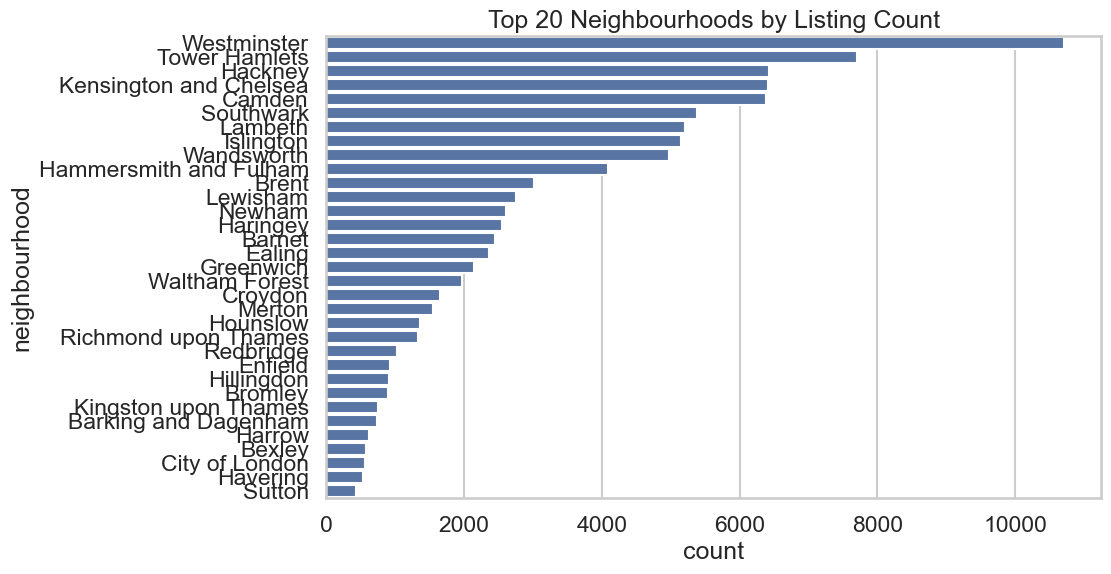

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Assume df is your DataFrame containing the Airbnb data.
# Basic cleaning
df = df_airbnb_total.dropna(subset=['latitude', 'longitude', 'neighbourhood'])

# Calculate number of listings per neighbourhood
listing_counts = df['neighbourhood'].value_counts().reset_index()
listing_counts.columns = ['neighbourhood', 'count']
print(listing_counts.head())

# Create a base map centered on London (approximate coordinates)
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Add heatmap of listings
heat_data = df[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=8, blur=6).add_to(m)

# Save map to an HTML file
m

# Plot distribution of listings per neighbourhood
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='neighbourhood', data=listing_counts)
plt.title('Top 20 Neighbourhoods by Listing Count')
plt.show()


In [260]:
# df_total = pd.merge(df_total, df_land_pop_filtered, left_on = ['Borough Code'], right_on = ['Code']).drop('Code',  axis=1)
# df_total = df_total.drop('Name', axis=1)
# df_total

In [261]:
airbnb_STL_availability = df_total[df_total['availability_365'] <= 90]
airbnb_STL_availability
airbnb_STL_availability.drop(airbnb_STL_availability[np.isnan(airbnb_STL_availability['price'])].index, inplace=True)
airbnb_STL_availability.drop(airbnb_STL_availability[np.isnan(airbnb_STL_availability['availability_365']) & 
                                                     airbnb_STL_availability['availability_365'] != 0].index, inplace=True)
airbnb_STL_availability = airbnb_STL_availability[['Borough Code', 'neighbourhood', 'availability_365']]


# Group by Borough Code and neighbourhood, then count the number of rows
STL_counts = airbnb_STL_availability.groupby(['Borough Code', 'neighbourhood']).size().reset_index(name='STL count')

# Display the resulting DataFrame
print(STL_counts)

sum = STL_counts['STL count'].sum()
sum

   Borough Code           neighbourhood  STL count
0     E09000001          City of London        100
1     E09000002    Barking and Dagenham        129
2     E09000003                  Barnet        478
3     E09000004                  Bexley         79
4     E09000005                   Brent        668
5     E09000006                 Bromley        181
6     E09000007                  Camden       1295
7     E09000008                 Croydon        287
8     E09000009                  Ealing        425
9     E09000010                 Enfield        137
10    E09000011               Greenwich        359
11    E09000012                 Hackney       1141
12    E09000013  Hammersmith and Fulham        794
13    E09000014                Haringey        475
14    E09000015                  Harrow        107
15    E09000016                Havering         85
16    E09000017              Hillingdon        145
17    E09000018                Hounslow        229
18    E09000019               I

C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\2961641663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_STL_availability.drop(airbnb_STL_availability[np.isnan(airbnb_STL_availability['price'])].index, inplace=True)
C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\2961641663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_STL_availability.drop(airbnb_STL_availability[np.isnan(airbnb_STL_availability['availability_365']) &


np.int64(18421)

In [262]:
STL_counts = pd.merge(STL_counts, df_land_pop_filtered, left_on='Borough Code', right_on='Code').drop('Code', axis=1)
STL_counts = STL_counts.drop('Name', axis=1)
STL_counts['airbnb_STL_density'] = STL_counts['STL count'] / STL_counts['Total_Area_Hectares']

In [263]:
STL_price = pd.merge(STL_counts, airbnb_mean_price, on='Borough Code')
STL_price

,Borough Code,neighbourhood,STL count,Population,Total_Area_Hectares,Population_per_hectare,airbnb_STL_density,Mean Price
0,E09000001,City of London,100,8526,314.9,29.4,0.317561,268.852732
1,E09000002,Barking and Dagenham,129,229337,3779.9,63.5,0.034128,111.605042
2,E09000003,Barnet,478,420924,8674.8,48.5,0.055102,138.207671
3,E09000004,Bexley,79,262798,6428.6,43.4,0.012289,99.355319
4,E09000005,Brent,668,353130,4323.3,81.7,0.154512,155.698219
5,E09000006,Bromley,181,347455,15013.5,23.1,0.012056,113.805839
6,E09000007,Camden,1295,263550,2178.9,121.0,0.594337,215.062673
7,E09000008,Croydon,287,416582,8650.4,48.2,0.033178,101.863986
8,E09000009,Ealing,425,393434,5554.4,70.8,0.076516,140.421085
9,E09000010,Enfield,137,355209,8220.1,43.9,0.016666,128.619968


In [264]:
correlation = STL_price['airbnb_STL_density'].corr(STL_price['Mean Price'])
print(f"Pearson Correlation: {correlation}")

if correlation >= 0.8:
    print("Tha pearson correlation shows a very strong positive linear relationship between STL density and rent price.")
else:
    print("Tha pearson correlation shows not a very strong positive linear relationship between STL density and rent price.")    

Pearson Correlation: 0.8064427672826482
Tha pearson correlation shows a very strong positive linear relationship between STL density and rent price.


Borough Code              0
neighbourhood             0
STL count                 0
Population                0
Total_Area_Hectares       0
Population_per_hectare    0
airbnb_STL_density        0
Mean Price                0
dtype: int64


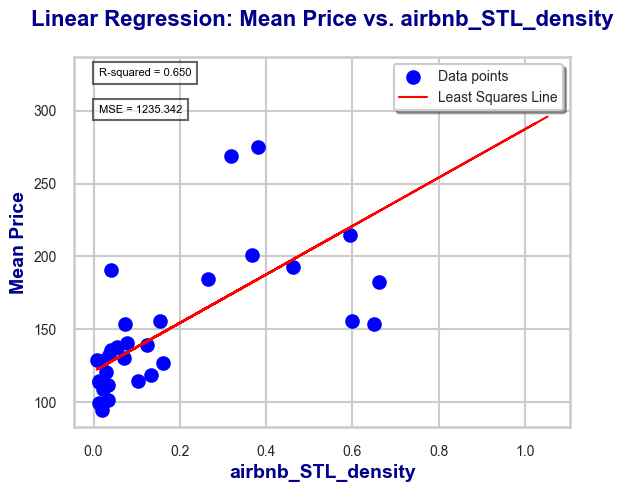

In [283]:
simple_linear_regression(STL_price, 'airbnb_STL_density', 'Mean Price')

In [266]:
# df_total_1 = df_total.assign(airbnb_STL_density = STL_counts['airbnb_STL_density'])

colums_to_dropna = ['price', 'minimum_nights', 'reviews_per_month']
df_total_1 = df_total.dropna(subset = colums_to_dropna)

df_total_1.head()


,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Borough Code
0,116268,586671,Enfield,51.611370,-0.118880,Private room,40.0,7,38,2024-01-01,0.28,1,105,1,E09000010
1,117203,255103,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5,91,2024-06-09,0.59,1,33,10,E09000013
2,127652,134938,Camden,51.559528,-0.144319,Entire home/apt,215.0,5,216,2024-07-09,1.35,1,134,5,E09000007
4,131444,646165,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30,148,2024-06-15,0.93,2,6,12,E09000022
5,137581,471088,City of London,51.510990,-0.078620,Entire home/apt,145.0,5,248,2024-08-13,1.55,1,160,24,E09000001


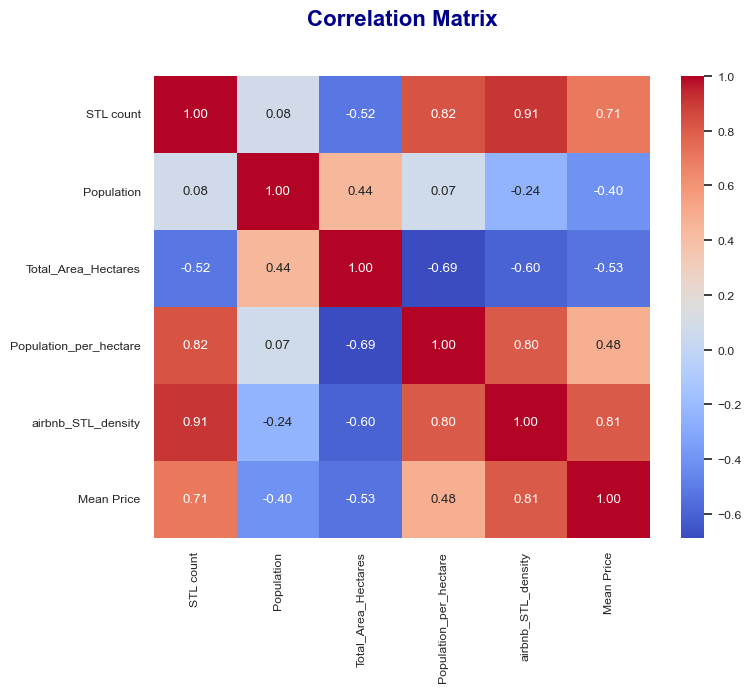

In [267]:
numerical_STL = STL_price.select_dtypes(include=['number'])

## Specify the columns to drop 
# columns_to_drop = ['id', 'host_id', 'latitude', 'longitude', 'cluster'] 
## Drop the columns 
# df_corr= numerical_df_total.drop(columns=columns_to_drop, axis=1)

corr_matrix = numerical_STL.corr()

# Create a heatmap with the correlation values
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix\n', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.show()

Step 2: Listing Price and Type Analysis

In [268]:
# Data Preprocessing
# Select necessary fields
columns_needed = ['neighbourhood', 'room_type', 'price']
data_roomtype = df_airbnb_total[columns_needed].dropna()

# Convert price to float
data_roomtype['price'] = pd.to_numeric(data_roomtype['price'], errors='coerce')
data_roomtype= data_roomtype.dropna()

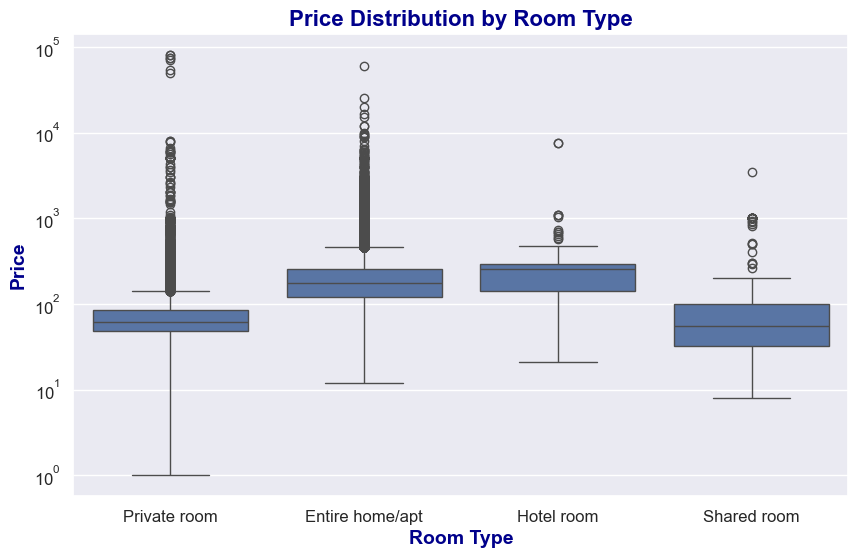

In [269]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_roomtype, x='room_type', y='price')
plt.yscale('log')  # Use log scale if prices vary widely
plt.title("Price Distribution by Room Type", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Room Type", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price",fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

ANOVA test result: F_onewayResult(statistic=np.float64(108.90145609221477), pvalue=np.float64(2.5061499553680284e-70))
Pairwise t-test results:
Private room vs Entire home/apt: t-statistic = -13.555, p-value = 1.065e-41
Private room vs Hotel room: t-statistic = -3.131, p-value = 2.152e-03
Private room vs Shared room: t-statistic = -1.700, p-value = 8.985e-02
Entire home/apt vs Hotel room: t-statistic = -1.607, p-value = 1.106e-01
Entire home/apt vs Shared room: t-statistic = 4.766, p-value = 3.024e-06
Hotel room vs Shared room: t-statistic = 2.645, p-value = 9.088e-03
Impact of Room Type on Price:
                 Coefficient
Hotel room        132.724269
Private room     -127.390769
Shared room       -91.460227
Entire home/apt   238.767919


C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\1784758891.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


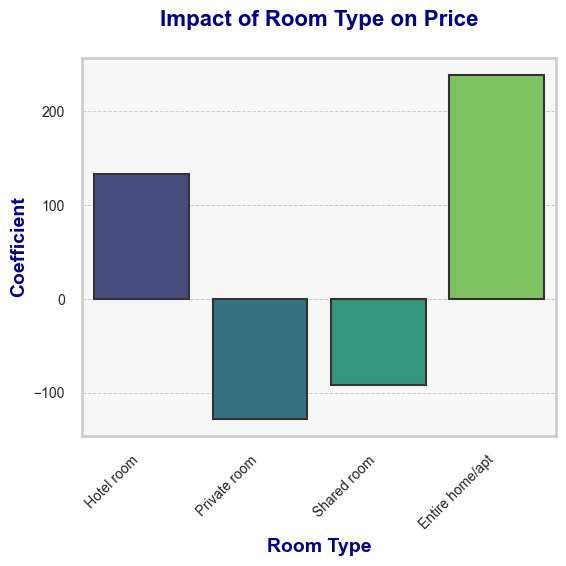

In [270]:
# Statistical Analysis - ANOVA Test for Price Differences
anova_result = f_oneway(
    data_roomtype[data_roomtype['room_type'] == 'Entire home/apt']['price'],
    data_roomtype[data_roomtype['room_type'] == 'Private room']['price'],
    data_roomtype[data_roomtype['room_type'] == 'Shared room']['price'],
    data_roomtype[data_roomtype['room_type'] == 'Hotel room']['price']
)
print("ANOVA test result:", anova_result)

# Pairwise t-tests between room types
def t_test_pairs(df, col, group_col):
    groups = df[group_col].unique()
    results = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = df[df[group_col] == groups[i]][col]
            group2 = df[df[group_col] == groups[j]][col]
            t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
            results.append((groups[i], groups[j], t_stat, p_val))
    return results

pairwise_tests = t_test_pairs(data_roomtype, 'price', 'room_type')
print("Pairwise t-test results:")
for result in pairwise_tests:
    print(f"{result[0]} vs {result[1]}: t-statistic = {result[2]:.3f}, p-value = {result[3]:.3e}")

# Visualization of Room Type Impact on Price
room_type_encoded = pd.get_dummies(data_roomtype['room_type'], drop_first=True)
X = room_type_encoded
y = data_roomtype['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_

# Coefficients and Interpretation
coefficients = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=["Coefficient"]
)
coefficients.loc['Entire home/apt'] = intercept

print("Impact of Room Type on Price:")
print(coefficients)

# Plot Coefficients
# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the figure
plt.figure(figsize=(6, 6))

# Customizing the barplot with a palette and bar edge color
sns.barplot(
    x=coefficients.index,
    y="Coefficient",
    data=coefficients,
    palette="viridis",
    edgecolor=".2"
)

# Adding titles and labels with improved fonts and sizes
plt.title("Impact of Room Type on Price\n", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Coefficient", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Room Type", fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(fontsize = 10, rotation=45, ha='right')
plt.yticks(fontsize = 10)

# Adding grid lines to the plot
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#f7f7f7')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


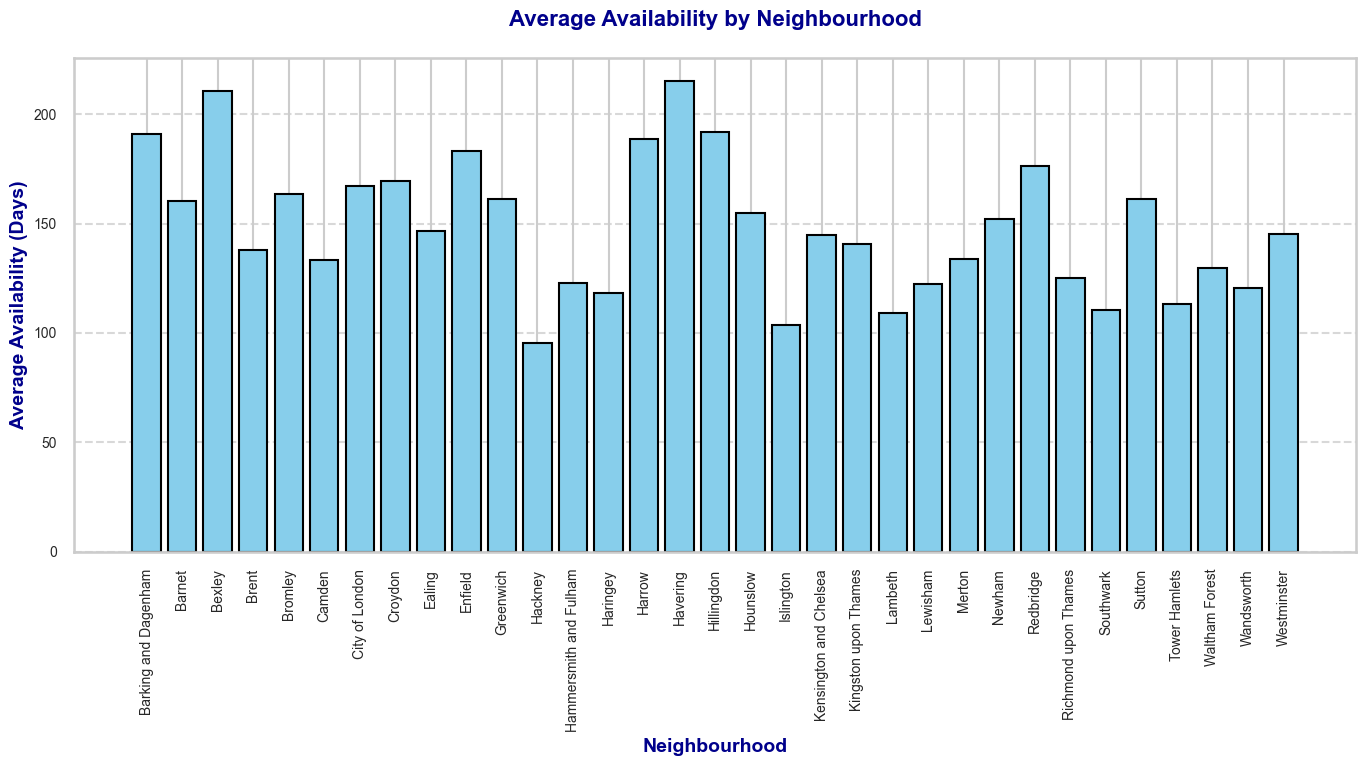

In [271]:
# Load the CSV file
url = "https://raw.githubusercontent.com/wbwhaha/FSDS_Group_Assignment/main/Datasets/listings.csv"
try:
    listings = pd.read_csv(url)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Calculate average availability by neighbourhood
neighbourhood_activity = (
    listings.groupby("neighbourhood").agg({"availability_365": "mean"}).reset_index()
)

# Rename columns for clarity
neighbourhood_activity.columns = ["Neighbourhood", "Avg Availability (Days)"]

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(
    neighbourhood_activity["Neighbourhood"],
    neighbourhood_activity["Avg Availability (Days)"],
    color="skyblue",
    edgecolor="black",
)

# Add title and labels
plt.title("Average Availability by Neighbourhood\n", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Neighbourhood", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Average Availability (Days)", fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
# Add a grid for better visualization
plt.grid(axis="y", linestyle='--', alpha=0.75)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

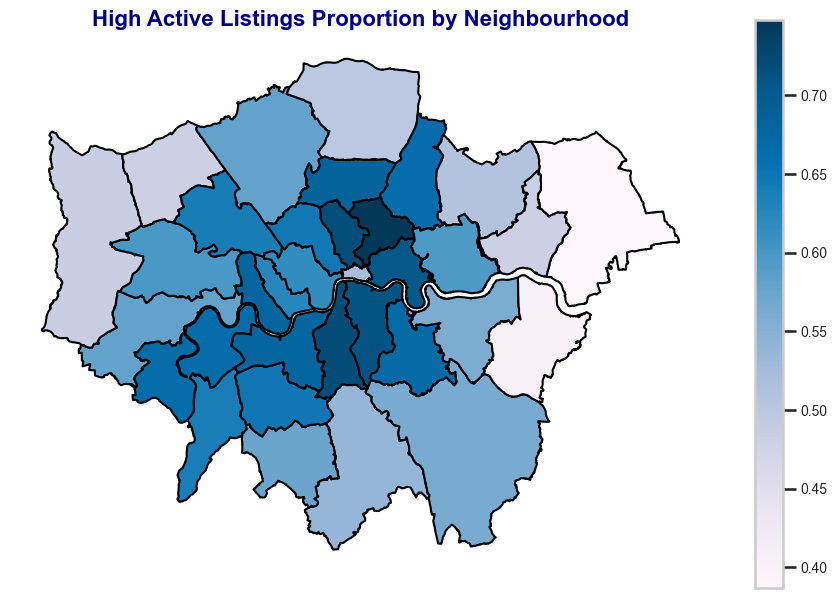

In [272]:
# Categorize listings into high and low active groups
high_active_threshold = 180  # Define threshold for high active listings
listings['activity_level'] = listings['availability_365'].apply(
    lambda x: 'High Active' if x >= high_active_threshold else 'Low Active'
)

# Calculate high and low active counts by neighbourhood
activity_distribution = listings.groupby(['neighbourhood', 'activity_level']).agg({
    'id': 'count'
}).unstack(fill_value=0).reset_index()
activity_distribution.columns = ['Neighbourhood', 'Low Active', 'High Active']

# Calculate proportion of high active listings
activity_distribution['Total Listings'] = activity_distribution['Low Active'] + activity_distribution['High Active']
activity_distribution['High Active Proportion'] = activity_distribution['High Active'] / activity_distribution['Total Listings']
activity_distribution['Low Active Proportion'] = activity_distribution['Low Active'] / activity_distribution['Total Listings']

# Load GeoJSON file
geojson_url = "https://raw.githubusercontent.com/wbwhaha/FSDS_Group_Assignment/refs/heads/main/Other%20data/neighbourhoods.geojson"
neighbourhoods_geo = gpd.read_file(geojson_url)

# Merge GeoJSON with activity data
geo_high_active = neighbourhoods_geo.merge(activity_distribution, 
                                           how='left', 
                                           left_on='neighbourhood', 
                                           right_on='Neighbourhood')

import matplotlib
matplotlib.rcParams['font.size'] = 8

# Plot High Active Proportion map
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

a_2 = geo_high_active.plot(column='High Active Proportion', 
                     cmap='PuBu', 
                     legend=True, 
                     ax=ax, 
                     edgecolor='black')

figure_2 = a_2.figure
cb_ax_2 = figure_2.axes[1]
cb_ax_2.tick_params(labelsize=10)

ax.set_title("High Active Listings Proportion by Neighbourhood", fontsize=16, fontweight='bold', color='darkblue')
ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\902818769.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  london_gdf = london_gdf.merge(borough_stats, on='NAME', how='left').fillna(0)
C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\902818769.py:62: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(london_gdf.geometry.centroid.x, london_gdf.geometry.centroid.y, london_gdf['NAME']):
C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\902818769.py:70: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS be

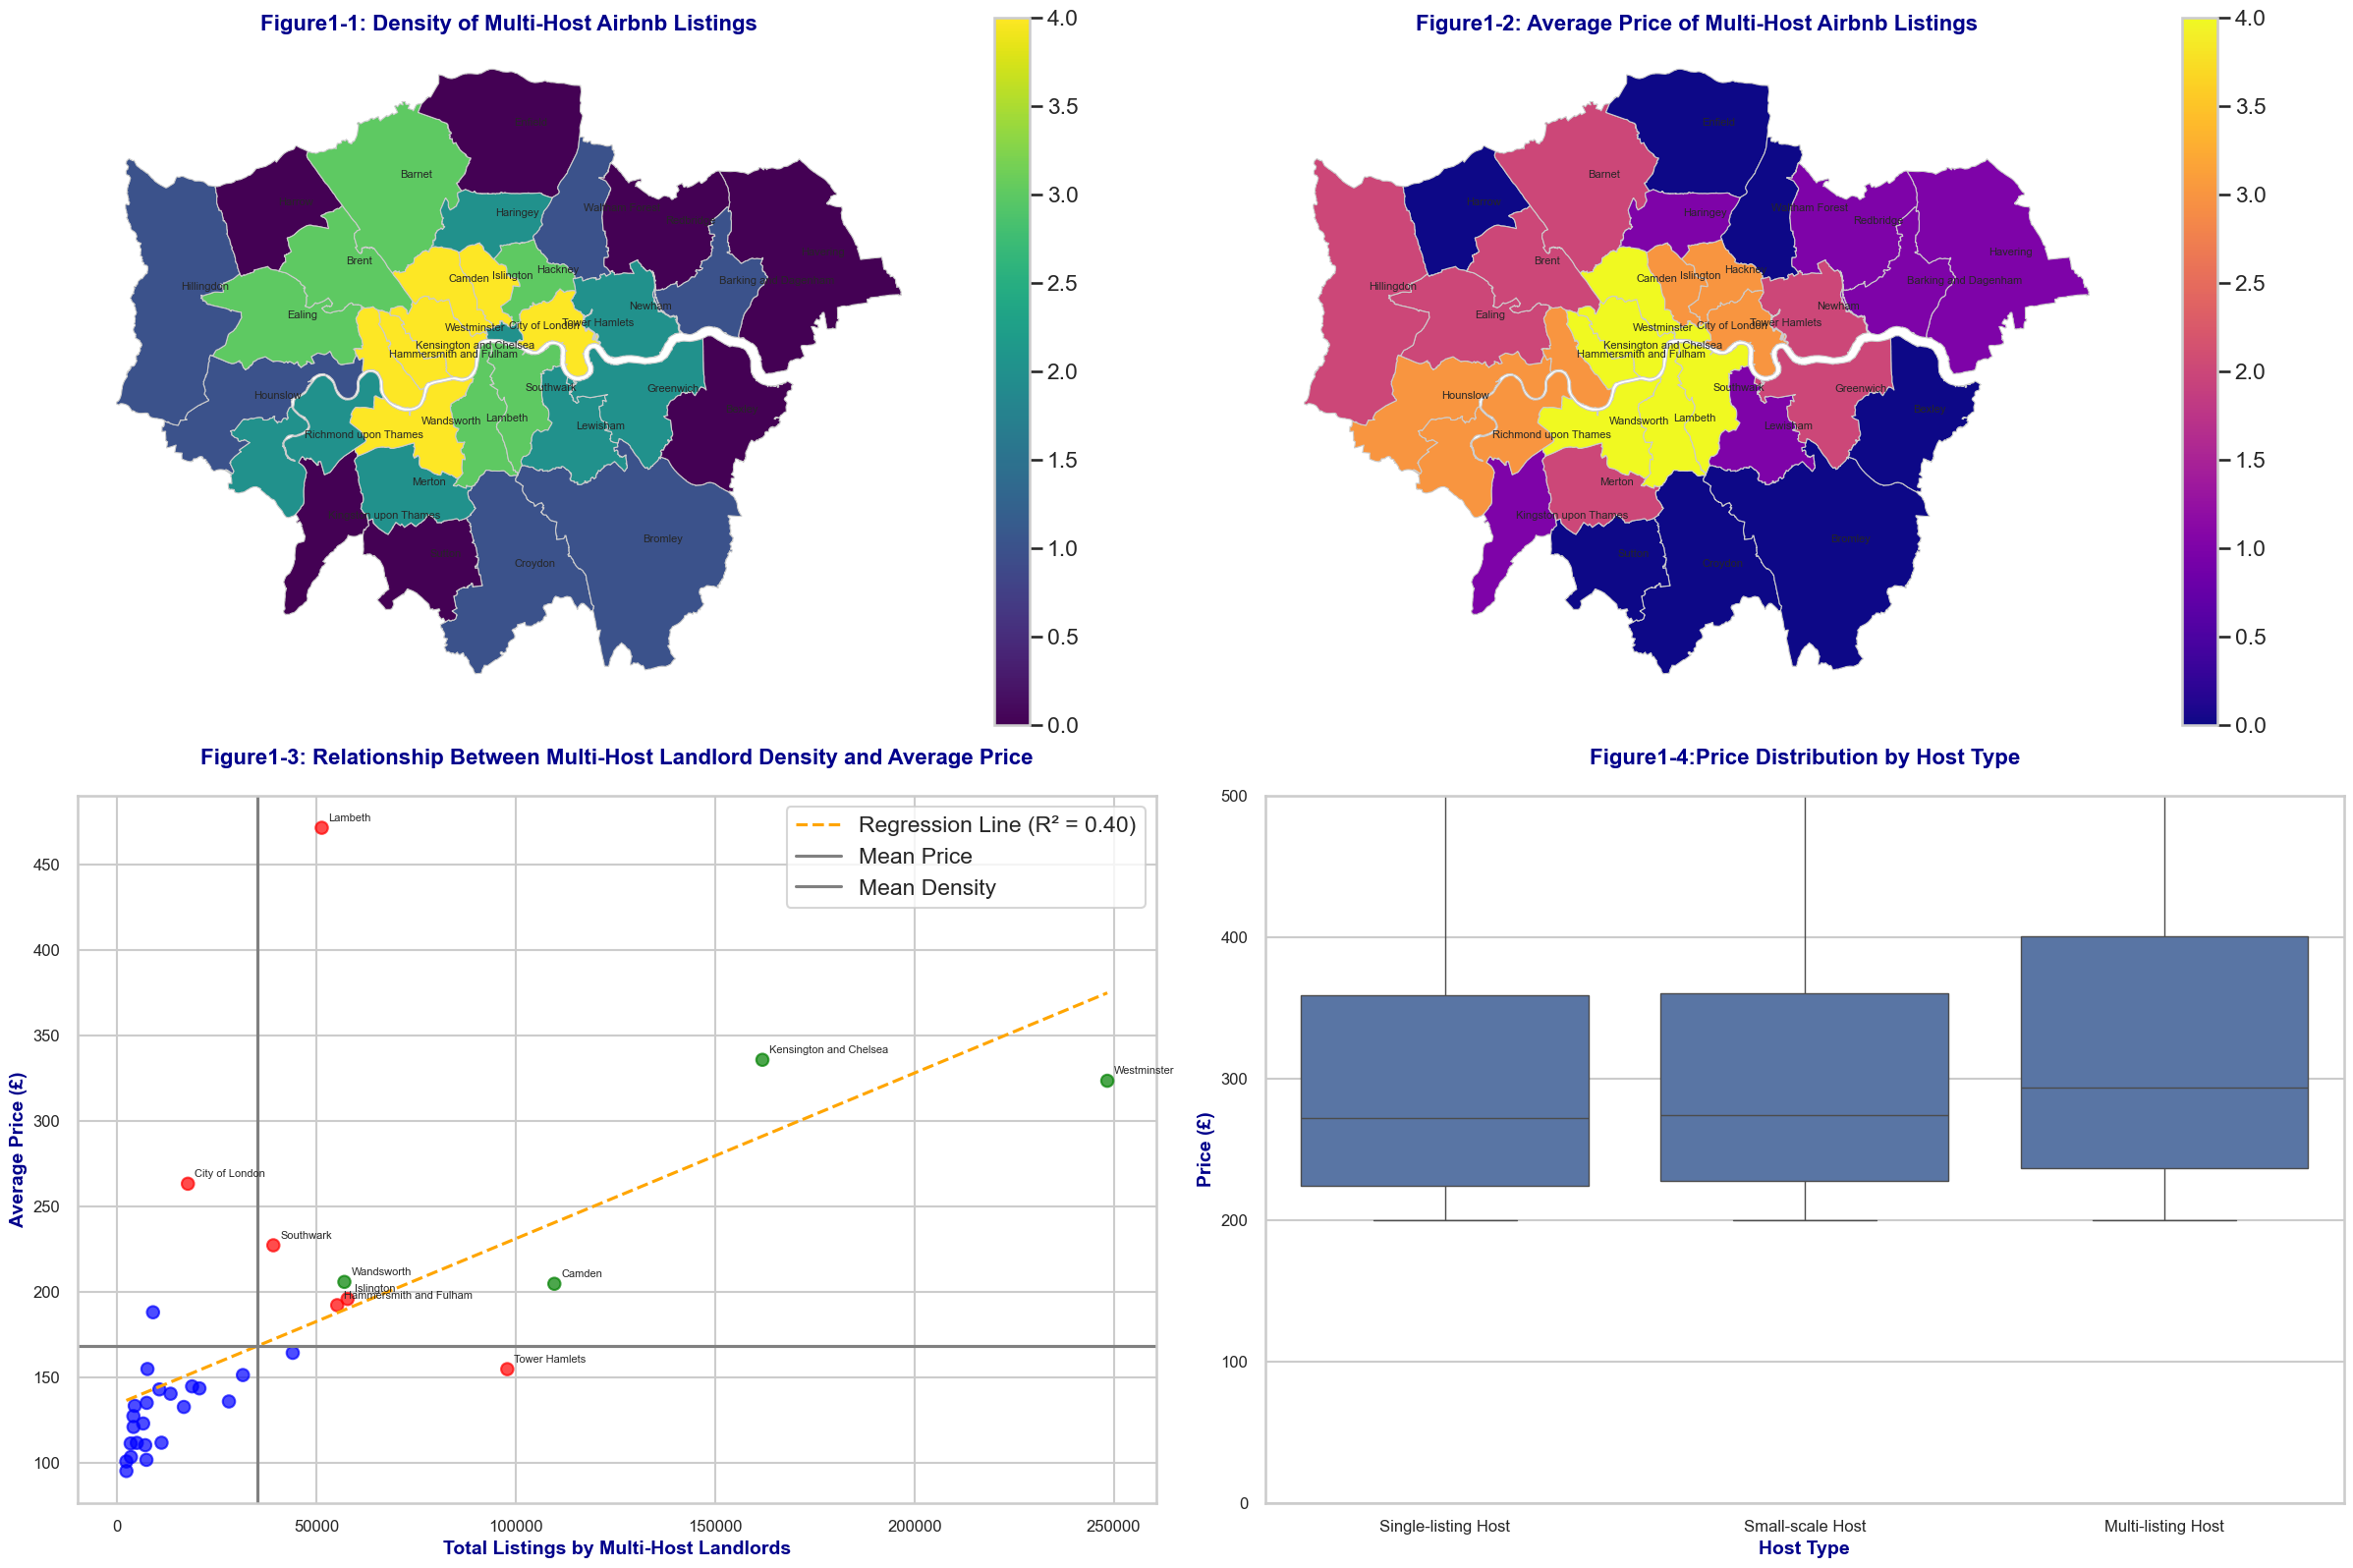

In [273]:
try:
    # Columns needed for analysis
    columns_needed = ['calculated_host_listings_count', 'neighbourhood', 'price', 'availability_365', 'room_type', 'longitude', 'latitude']
    df_airbnb_total_Q4_1 = df_airbnb_total[columns_needed].dropna()

    # Convert 'price' to numeric, removing any dollar signs or commas
    df_airbnb_total_Q4_1['price'] = pd.to_numeric(df_airbnb_total_Q4_1['price'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
    df_airbnb_total_Q4_1 = df_airbnb_total_Q4_1.dropna()

    # Function to categorize hosts based on listing count
    def categorize_host(count):
        if count == 1:
            return 'Single-listing Host'
        elif 2 <= count <= 4:
            return 'Small-scale Host'
        else:
            return 'Multi-listing Host'

    # Apply the function to create a new column 'host_type'
    df_airbnb_total_Q4_1['host_type'] = df_airbnb_total_Q4_1['calculated_host_listings_count'].apply(categorize_host)

    # Filter data for listings with price between 200 and 1000
    data_filtered = df_airbnb_total_Q4_1[(df_airbnb_total_Q4_1['price'] >= 200) & (df_airbnb_total_Q4_1['price'] <= 1000)]

    # Filter data for multi-host listings
    multi_host_df = df_airbnb_total_Q4_1[df_airbnb_total_Q4_1['calculated_host_listings_count'] >= 3]
    geometry = gpd.points_from_xy(multi_host_df['longitude'], multi_host_df['latitude'])
    gdf_airbnb = gpd.GeoDataFrame(multi_host_df, geometry=geometry, crs="EPSG:4326").to_crs(london_gdf.crs)

    # Spatial join with London boroughs to get borough names
    joined = gpd.sjoin(gdf_airbnb, london_gdf, how="left", predicate="intersects")
    borough_stats = joined.groupby('NAME').agg({'calculated_host_listings_count': 'sum', 'price': 'mean'}).reset_index()
    london_gdf = london_gdf.merge(borough_stats, on='NAME', how='left').fillna(0)

    # Classify boroughs by density and price using quantiles
    density_classifier = mapclassify.Quantiles(london_gdf['calculated_host_listings_count'], k=5)
    price_classifier = mapclassify.Quantiles(london_gdf['price'], k=5)
    london_gdf['density_class'] = density_classifier.yb
    london_gdf['price_class'] = price_classifier.yb

    # Calculate density and price thresholds (80th percentile)
    density_threshold = london_gdf['calculated_host_listings_count'].quantile(0.8)
    price_threshold = london_gdf['price'].quantile(0.8)

    # Determine high density and high price boroughs
    london_gdf['high_density'] = london_gdf['calculated_host_listings_count'] >= density_threshold
    london_gdf['high_price'] = london_gdf['price'] >= price_threshold

    # Perform linear regression between listings count and price
    slope, intercept, r_value, p_value, std_err = linregress(london_gdf['calculated_host_listings_count'], london_gdf['price'])
    x_values = np.linspace(london_gdf['calculated_host_listings_count'].min(), london_gdf['calculated_host_listings_count'].max(), 100)
    y_values = slope * x_values + intercept

    # Create combined figure (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(24, 16))

    # Plot density class on the first subplot
    london_gdf.plot(column='density_class', cmap='viridis', linewidth=0.8, ax=axes[0, 0], edgecolor='0.8', legend=True)
    axes[0, 0].set_title('Figure1-1: Density of Multi-Host Airbnb Listings', fontsize=16, fontweight='bold', color='darkblue')
    axes[0, 0].set_axis_off()
    # Annotate borough names
    for x, y, label in zip(london_gdf.geometry.centroid.x, london_gdf.geometry.centroid.y, london_gdf['NAME']):
        axes[0, 0].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

    # Plot price class on the second subplot
    london_gdf.plot(column='price_class', cmap='plasma', linewidth=0.8, ax=axes[0, 1], edgecolor='0.8', legend=True)
    axes[0, 1].set_title('Figure1-2: Average Price of Multi-Host Airbnb Listings', fontsize=16, fontweight='bold', color='darkblue')
    axes[0, 1].set_axis_off()
    # Annotate borough names
    for x, y, label in zip(london_gdf.geometry.centroid.x, london_gdf.geometry.centroid.y, london_gdf['NAME']):
        axes[0, 1].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

    # Scatter plot showing the relationship between listings count and price
    axes[1, 0].scatter(london_gdf['calculated_host_listings_count'], london_gdf['price'],
                        c=['green' if (h and p) else 'red' if (h or p) else 'blue' for h, p in zip(london_gdf['high_density'], 
                        london_gdf['high_price'])], 
                        alpha=0.7)
    axes[1, 0].plot(x_values, y_values, color='orange', linestyle='--', label=f'Regression Line (R² = {r_value**2:.2f})')
    axes[1, 0].axhline(y=london_gdf['price'].mean(), color='grey', linestyle='-', label='Mean Price')
    axes[1, 0].axvline(x=london_gdf['calculated_host_listings_count'].mean(), color='grey', linestyle='-', label='Mean Density')
    axes[1, 0].set_xlabel('Total Listings by Multi-Host Landlords', fontsize=14, fontweight='bold', color='darkblue')
    axes[1, 0].set_ylabel('Average Price (£)', fontsize=14, fontweight='bold', color='darkblue')
    axes[1, 0].set_title('Figure1-3: Relationship Between Multi-Host Landlord Density and Average Price\n', fontsize=16, fontweight='bold', color='darkblue')
    axes[1, 0].tick_params(axis='x', labelsize=12) 
    axes[1, 0].tick_params(axis='y', labelsize=12)
    axes[1, 0].legend()

    # Annotate high density and/or high price boroughs
    for i, txt in enumerate(london_gdf['NAME']):
        if london_gdf['high_density'][i] or london_gdf['high_price'][i]:
            axes[1, 0].annotate(txt, (london_gdf['calculated_host_listings_count'][i], london_gdf['price'][i]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=8)
    axes[1, 0].grid(True)

    # Airbnb Boxplot
    sns.boxplot(data=data_filtered, x='host_type', y='price', order=['Single-listing Host', 'Small-scale Host', 'Multi-listing Host'], ax=axes[1,1])
    axes[1, 1].set_ylim(0,500)
    axes[1, 1].set_title('Figure1-4:Price Distribution by Host Type\n', fontsize=16, fontweight='bold', color='darkblue')
    axes[1, 1].set_xlabel('Host Type', fontsize=14, fontweight='bold', color='darkblue')
    axes[1, 1].set_ylabel('Price (£)', fontsize=14, fontweight='bold', color='darkblue')
    axes[1, 1].tick_params(axis='x', labelsize=12) 
    axes[1, 1].tick_params(axis='y', labelsize=12)


    plt.tight_layout()
    plt.show()

    # print(london_gdf[['NAME', 'calculated_host_listings_count', 'price']].sort_values(by='calculated_host_listings_count', ascending=False))

except FileNotFoundError:
    print("Error: Data file not found. Please check the file paths.")
except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found. Check column names in your CSV.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\1064940082.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_total_Q4_2['price'] = pd.to_numeric(df_airbnb_total_Q4_2['price'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce') # Convert price to numeric, handling errors
C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\1064940082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_total_Q4_2.dropna(inplace=True)  # Remove rows with missing values
C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\1064940082.py:23: SettingWithC

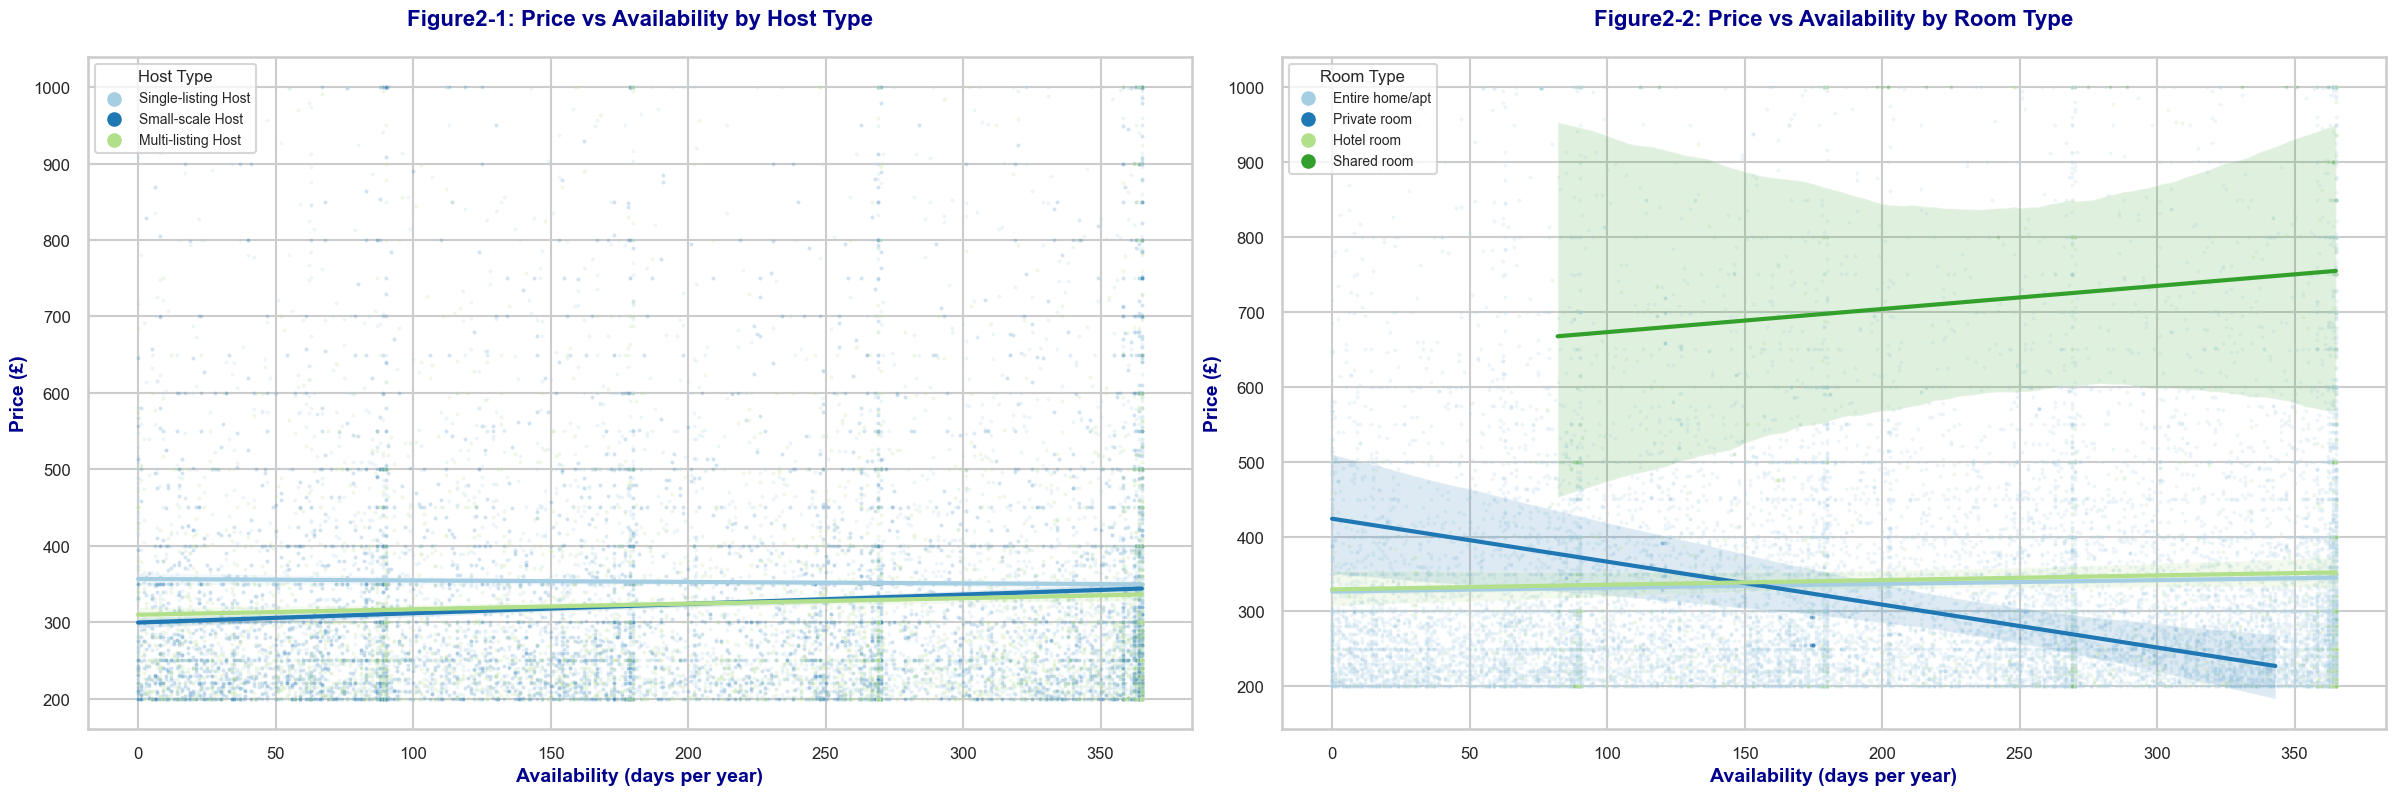

In [274]:
try:
    # Filter the required columns
    columns_needed = [
        'calculated_host_listings_count', 'neighbourhood', 'price',
        'availability_365', 'room_type'
    ]
    df_airbnb_total_Q4_2 = df_airbnb_total[columns_needed]

    # Data cleaning
    df_airbnb_total_Q4_2['price'] = pd.to_numeric(df_airbnb_total_Q4_2['price'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce') # Convert price to numeric, handling errors
    df_airbnb_total_Q4_2.dropna(inplace=True)  # Remove rows with missing values

    # Host Behavior Distribution
    # Define host types based on the number of listings
    def categorize_host(count):
        if count == 1:
            return 'Single-listing Host'
        elif 2 <= count <= 4:
            return 'Small-scale Host'
        else:
            return 'Multi-listing Host'

    df_airbnb_total_Q4_2['host_type'] = df_airbnb_total_Q4_2['calculated_host_listings_count'].apply(categorize_host)

    # Price and Room Type Regression Analysis
    # Filter data with price between 200 and 1000 to mitigate outlier effects
    data_filtered = df_airbnb_total_Q4_2[(df_airbnb_total_Q4_2['price'] >= 200) & (df_airbnb_total_Q4_2['price'] <= 1000)]

    # Create a figure with two subplots side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

    # Plot 1: Price vs Availability by Host Type
    host_types = data_filtered['host_type'].unique()
    palette_host = sns.color_palette('Paired', n_colors=len(host_types))

    for (cat, group), color in zip(data_filtered.groupby('host_type'), palette_host):
        # Sample if needed for clarity and speed
        sample_group = group.sample(n=5000, random_state=42) if len(group) > 5000 else group
        
        # Scatter plot
        sns.scatterplot(
            data=sample_group, 
            x='availability_365', 
            y='price', 
            color=color, 
            alpha=0.2, 
            s=8, 
            ax=ax1
        )
        
        # Regression line
        sns.regplot(
            data=group, 
            x='availability_365', 
            y='price', 
            scatter=False, 
            color=color, 
            line_kws={'linewidth': 3}, 
            ax=ax1
        )

    ax1.set_title('Figure2-1: Price vs Availability by Host Type\n', fontsize=16, fontweight='bold', color='darkblue')
    ax1.set_xlabel('Availability (days per year)', fontsize=14, fontweight='bold', color='darkblue')
    ax1.set_ylabel('Price (£)', fontsize=14, fontweight='bold', color='darkblue')
    ax1.tick_params(axis='x', labelsize=12) 
    ax1.tick_params(axis='y', labelsize=12)

    # Create a custom legend for Host Type subplot
    for cat, color in zip(host_types, palette_host):
        ax1.scatter([], [], color=color, label=cat)
    ax1.legend(title='Host Type', loc='upper left', fontsize=10, title_fontsize=12)

    # Plot 2: Price vs Availability by Room Type
    room_types = data_filtered['room_type'].unique()
    palette_room = sns.color_palette('Paired', n_colors=len(room_types))

    for (cat, group), color in zip(data_filtered.groupby('room_type'), palette_room):
        sns.scatterplot(
            data=group, 
            x='availability_365', 
            y='price', 
            color=color, 
            alpha=0.2, 
            s=8, 
            ax=ax2
        )
        
        sns.regplot(
            data=group, 
            x='availability_365', 
            y='price', 
            scatter=False, 
            color=color, 
            line_kws={'linewidth': 3}, 
            ax=ax2
        )

    ax2.set_title('Figure2-2: Price vs Availability by Room Type\n', fontsize=16, fontweight='bold', color='darkblue')
    ax2.set_xlabel('Availability (days per year)', fontsize=14, fontweight='bold', color='darkblue')
    ax2.set_ylabel('Price (£)', fontsize=14, fontweight='bold', color='darkblue')
    ax2.tick_params(axis='x', labelsize=12) 
    ax2.tick_params(axis='y', labelsize=12)

    # Create a custom legend for Room Type subplot
    for cat, color in zip(room_types, palette_room):
        ax2.scatter([], [], color=color, label=cat)
    ax2.legend(title='Room Type', loc='upper left', fontsize=10, title_fontsize=12)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: 'listings (1).csv' not found. Check the file path.")
except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found in the dataset. Check column names.")
except pd.errors.EmptyDataError:
    print("Error: The dataset is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [275]:
# Check for missing values in 'reviews_per_month' and 'price'
missing_before = df_airbnb_total[['reviews_per_month', 'price']].isna().sum()
print("Missing values before drop:\n", missing_before)

# Drop rows with missing values in 'reviews_per_month' and 'price'
df_airbnb_total_Q5_1 = df_airbnb_total.dropna(subset=['reviews_per_month', 'price'])

missing_after = df_airbnb_total_Q5_1[['reviews_per_month', 'price']].isna().sum()
print("Missing values after drop:\n", missing_after)

Missing values before drop:
 reviews_per_month    24533
price                32977
dtype: int64
Missing values after drop:
 reviews_per_month    0
price                0
dtype: int64


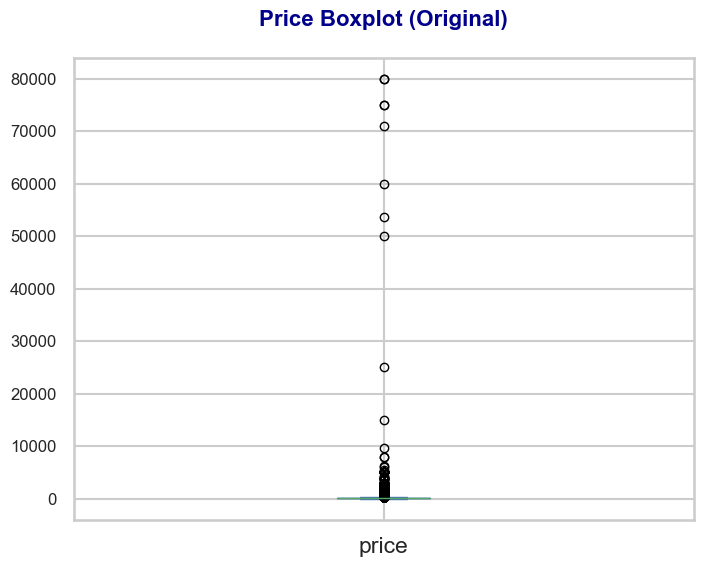

In [276]:
# Generate a boxplot for 'price' to check outliers
plt.figure(figsize=(8,6))
df_airbnb_total_Q5_1['price'].plot(kind='box')
plt.title('Price Boxplot (Original)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12)
plt.show()

# Use IQR method to detect and remove outliers
Q1 = df_airbnb_total_Q5_1['price'].quantile(0.25)
Q3 = df_airbnb_total_Q5_1['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

Number of outlier rows: 3127


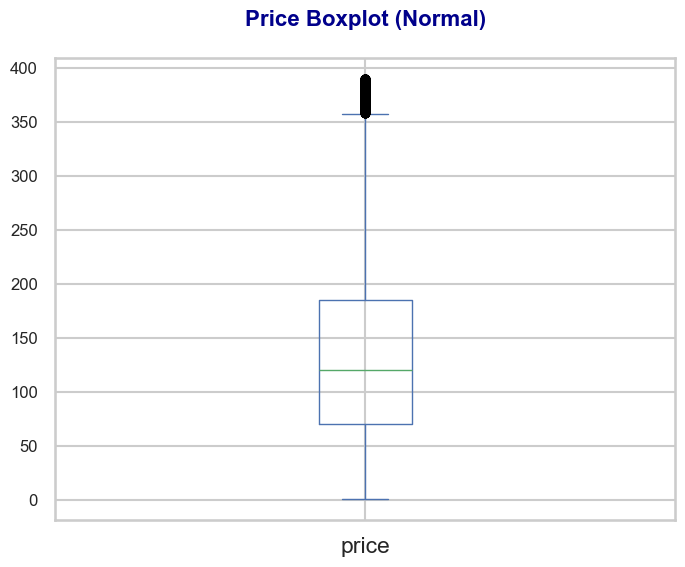

In [277]:
# Count outliers
outliers = df_airbnb_total_Q5_1[(df_airbnb_total_Q5_1['price'] < lower_bound) | (df_airbnb_total_Q5_1['price'] > upper_bound)]
print("Number of outlier rows:", len(outliers))

# Remove outliers
df_normal = df_airbnb_total_Q5_1[(df_airbnb_total_Q5_1['price'] >= lower_bound) & (df_airbnb_total_Q5_1['price'] <= upper_bound)]

# Generate boxplot of normal data
plt.figure(figsize=(8,6))
df_normal['price'].plot(kind='box')
plt.title('Price Boxplot (Normal)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12)
plt.show()

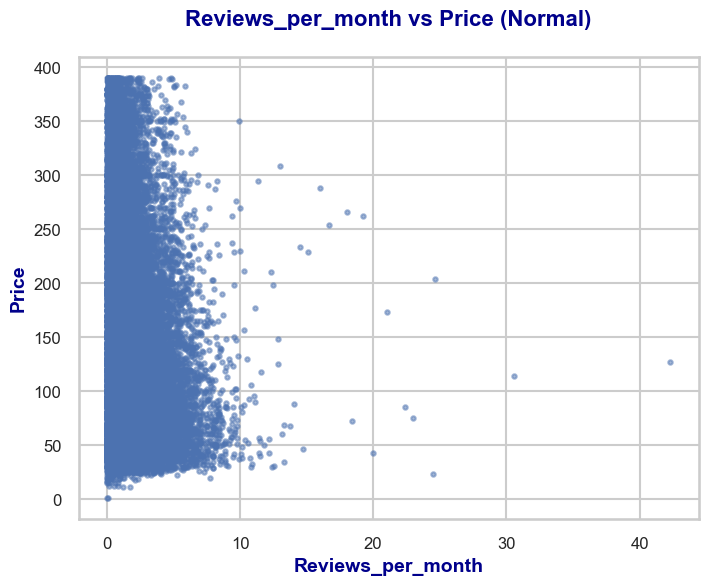

In [278]:
# Scatter plot of 'reviews_per_month' vs 'price' for normal data
plt.figure(figsize=(8,6))
plt.scatter(df_normal['reviews_per_month'], df_normal['price'], alpha=0.5, s=10)
plt.title('Reviews_per_month vs Price (Normal)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Reviews_per_month', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Price', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

KMeans Groups: group
1    11514
2    27385
3     5043
4     1666
5       31
Name: count, dtype: int64
group
1    0.252284
2    0.600035
3    0.110498
4    0.036504
5    0.000679
Name: count, dtype: float64
[4, 5]
Count: 1697


C:\Users\wbwha\AppData\Local\Temp\ipykernel_6772\2562538783.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['group'] = kmeans.fit_predict(data_for_clustering) + 1  # Add 1 to start groups from 1 instead of 0


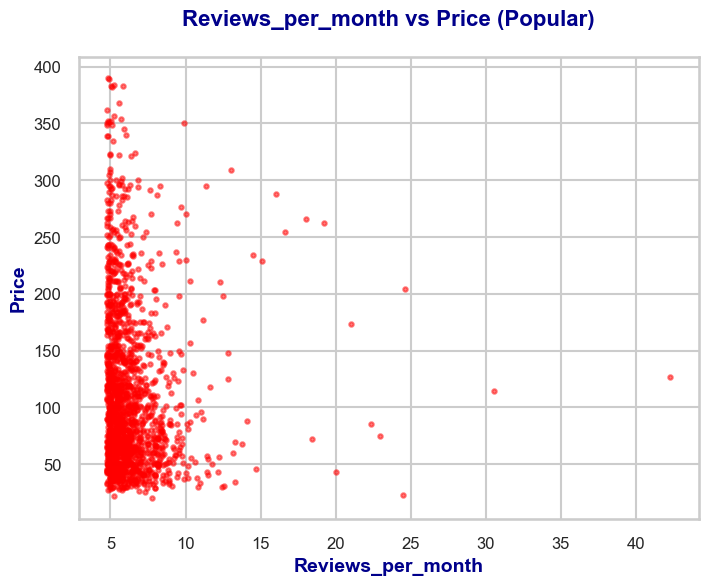

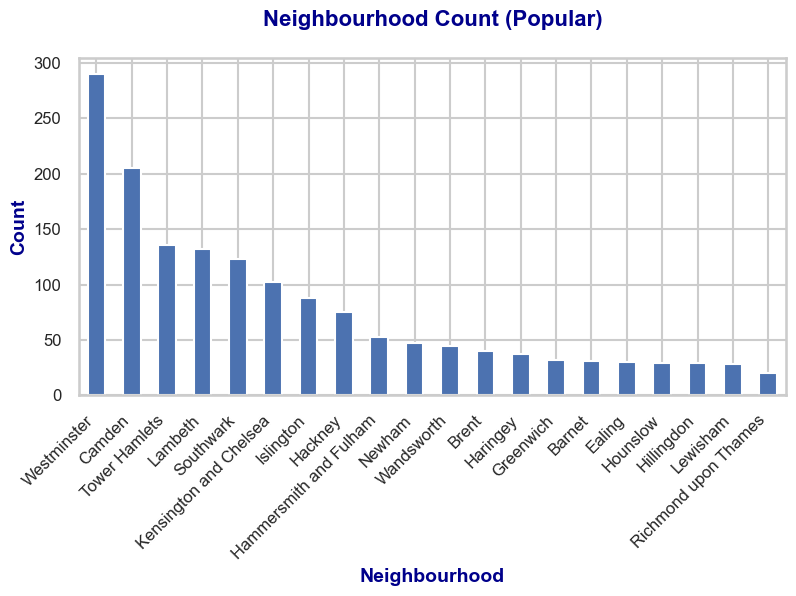

In [279]:
# Assuming df_normal is your dataframe and it already contains the 'reviews_per_month' column
data_for_clustering = df_normal[['reviews_per_month']].values

# Use KMeans to classify into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_normal['group'] = kmeans.fit_predict(data_for_clustering) + 1  # Add 1 to start groups from 1 instead of 0

# Print group info
group_counts = df_normal['group'].value_counts().sort_index()
print("KMeans Groups:", group_counts)
print(group_counts / len(df_normal))

# The top 2 groups are considered "most popular"
top_2_groups = sorted(group_counts.index)[-2:]
popular_data = df_normal[df_normal['group'].isin(top_2_groups)]

print(top_2_groups)
print("Count:", len(popular_data))

# Scatter plot of 'reviews_per_month' vs 'price' for popular data
plt.figure(figsize=(8, 6))
plt.scatter(popular_data['reviews_per_month'], popular_data['price'], alpha=0.5, c='red', s=10)
plt.title('Reviews_per_month vs Price (Popular)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Reviews_per_month', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Price', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Count 'neighbourhood' in popular data and generate a bar chart
neighbourhood_counts = popular_data['neighbourhood'].value_counts().head(20)

plt.figure(figsize=(8, 6))
neighbourhood_counts.plot(kind='bar')
plt.title('Neighbourhood Count (Popular)\n', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Neighbourhood', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()